In [37]:
import numpy as np
import pandas as pd
import re  # used to search words in text or paragraphs
from nltk.corpus import stopwords # to remove meaningless words such as a, the ,are.....
from nltk.stem.porter import PorterStemmer # filters the root word
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import nltk
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
Dataset2_true = pd.read_csv("/content/real.csv")
Dataset2_fake = pd.read_csv("/content/fake.csv")

In [5]:
Dataset2_true.nunique()

tweet    21244
dtype: int64

In [6]:
Dataset2_fake.nunique()

tweet    19580
dtype: int64

In [8]:
Dataset2_fake.head()

,tweet
0,"the tongue of his condition, now i saw things ..."
1,"by god the great, after i saw the derby of wyd..."
2,"believe in god, this zamalek fans are as good ..."
3,the coach appeared in the media and told the t...
4,asno smito\nwhoever knows her tells me a massa...


In [9]:
Dataset2_true['label']= 1
Dataset2_fake['label']= 0
Dataset2 = pd.concat([Dataset2_true, Dataset2_fake])
#Dataset2["Article"] = Dataset2["title"] + Dataset2["text"]
Dataset2.sample(frac = 1) #Shuffle 100%
#Dataset2 = Dataset2.loc[:,['Article','label']]

,tweet,label
18928,"marcel koller, coach of the club's first footb...",1
7565,"dr. gamal mohamed ali, chairman of the footbal...",1
605,d.72 and the positive tie continues between al...,1
13890,bulk absences in zamalek training\n#ontime_new...,1
2651,al-ahly had achieved victory over the arab con...,1
...,...,...
8820,"they pass the guard, ravenha, haha",0
587,what do you think of the performance of our na...,1
20402,happy new year mr. @sayedmoawad1,1
7820,"today, the matches of the sixth round of the m...",1


In [11]:
# Assuming your DataFrame is named df
Dataset2 = Dataset2.dropna()

In [41]:
Dataset2.isnull().sum()

tweet    0
label    0
dtype: int64

In [27]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [30]:
#Removal of HTML Contents
def remove_html(tweet):
    soup = BeautifulSoup(tweet, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(tweet):
    return re.sub('\[[^]]*\]', '', tweet)

# Removal of Special Characters
def remove_characters(tweet):
    return re.sub("[^a-zA-Z]"," ",tweet)

#Removal of stopwords
def remove_stopwords_and_lemmatization(tweet):
    final_tweet = []
    tweet = tweet.lower()
    tweet = nltk.word_tokenize(tweet)

    for word in tweet:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word)
            final_tweet.append(word)
    return " ".join(final_tweet)

#Total function
def cleaning(tweet):
    tweet = remove_html(tweet)
    tweet = remove_punctuations(tweet)
    tweet = remove_characters(tweet)
    tweet = remove_stopwords_and_lemmatization(tweet)
    return tweet

#Apply function on tweet column
Dataset2['tweet']=Dataset2['tweet'].apply(cleaning)

<ipython-input-30-6f0e802c7eea>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(tweet, "html.parser")


In [31]:
# Function to remove URLs
def remove_urls(tweet):
    url_pattern = re.compile(r'http\S+')
    return url_pattern.sub(r'', tweet)

# Apply the function to the 'tweet' column
Dataset2['tweet'] = Dataset2['tweet'].apply(remove_urls)

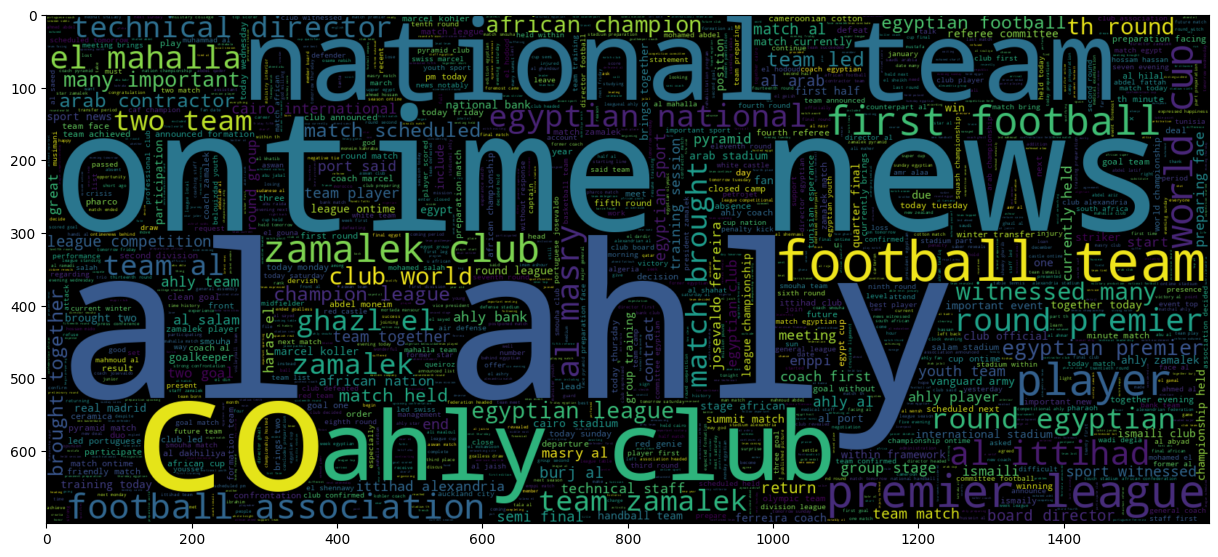

In [32]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 1].tweet))
plt.imshow(wc, interpolation="bilinear")

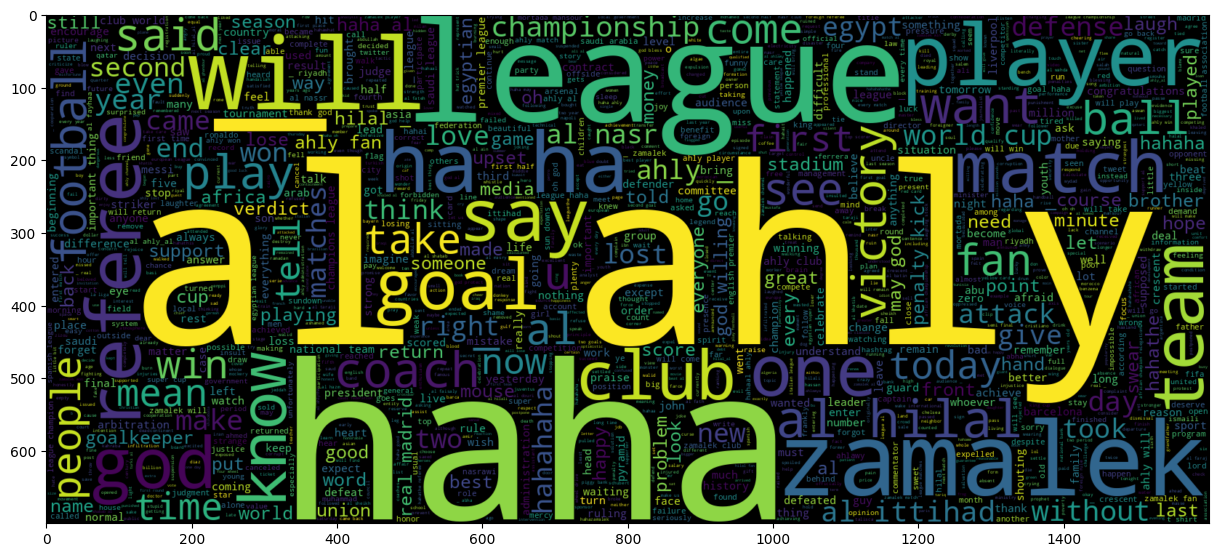

In [19]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 0].tweet))
plt.imshow(wc, interpolation="bilinear")

In [20]:
!pip install wordcloud matplotlib numpy pillow

In [24]:
# Load mask image
mask = np.array(Image.open('/content/M2jeo.jpg'))

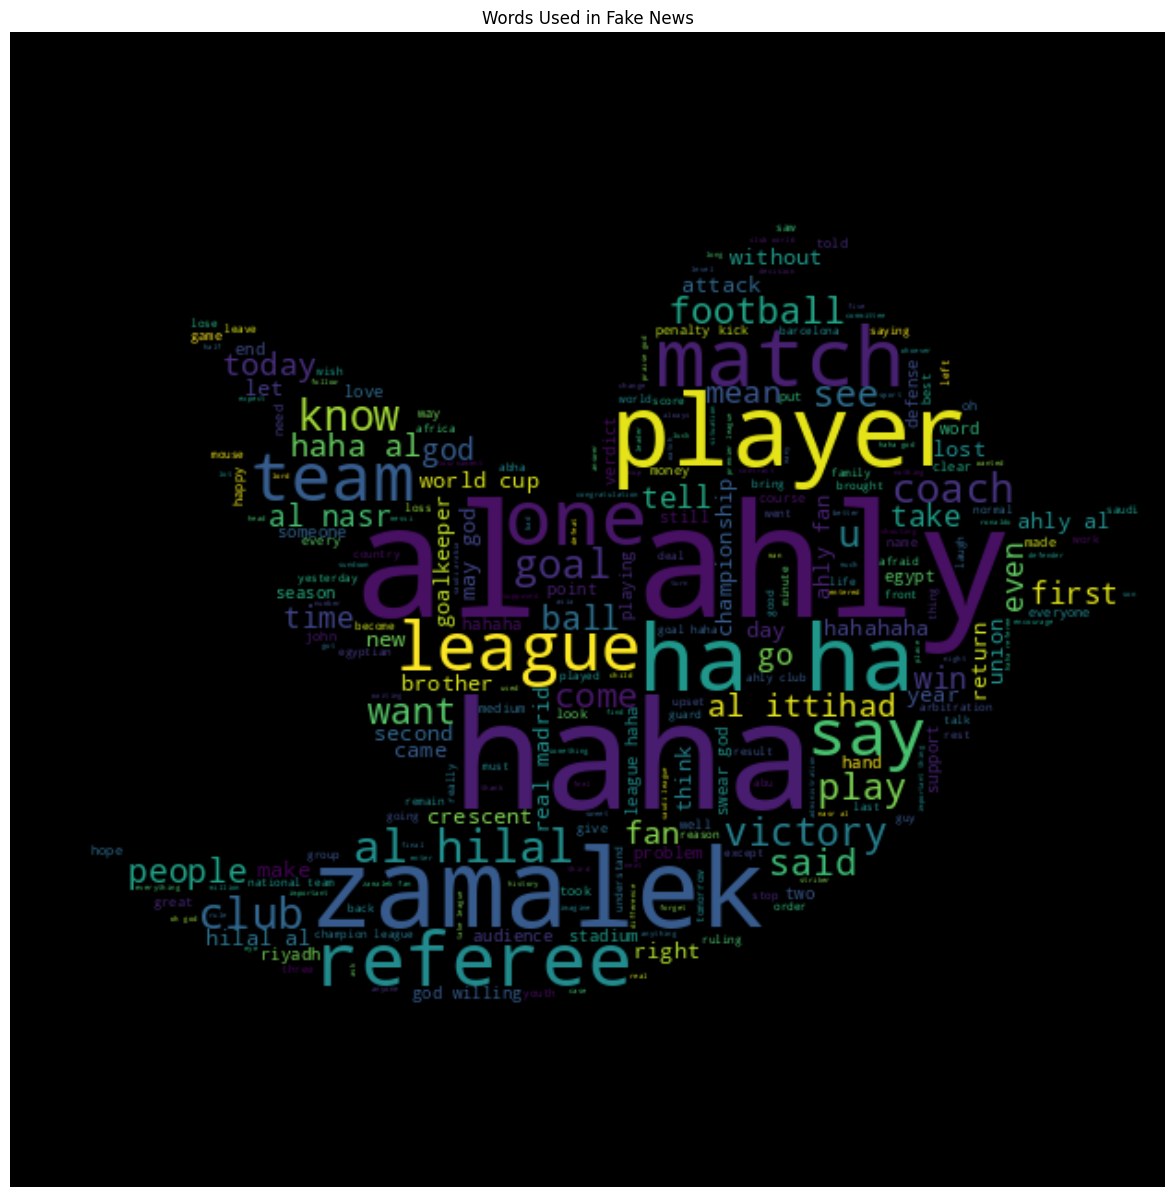

In [39]:
# Generate word cloud
wc = WordCloud(
    max_words=2000,
    width=1600,
    height=700,
    stopwords=STOPWORDS,
    mask=mask,
    contour_width=1,
    contour_color='black'
).generate(" ".join(Dataset2[Dataset2.label == 0].tweet))

# Display the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')  # Remove axes
plt.title('Words Used in Fake News')
plt.show()

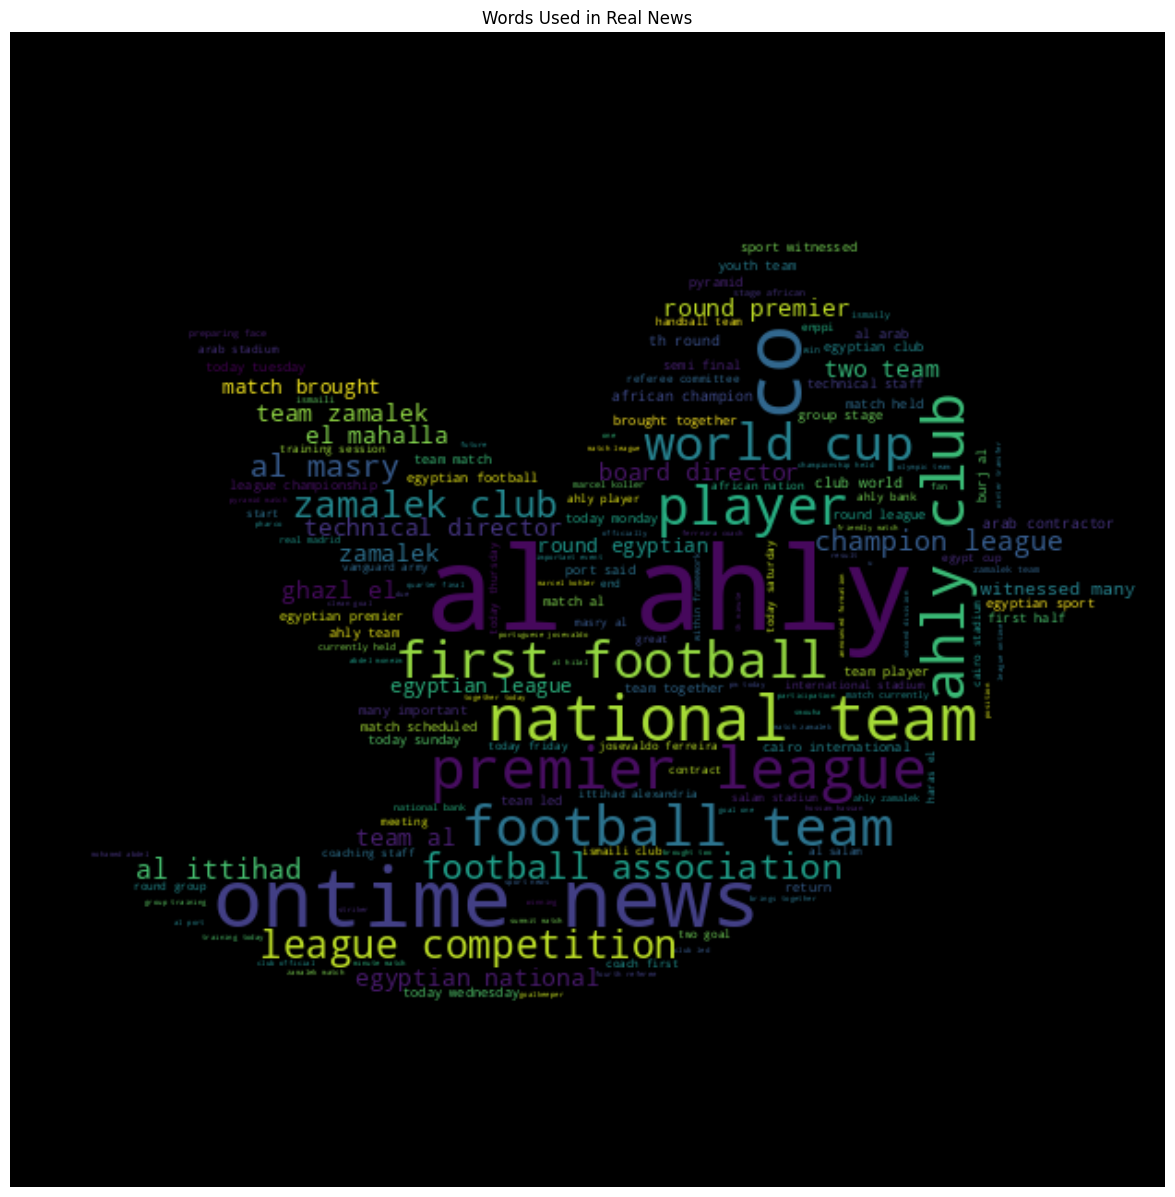

In [38]:
# Generate word cloud
wc = WordCloud(
    max_words=2000,
    width=1600,
    height=700,
    stopwords=STOPWORDS,
    mask=mask,
    contour_width=1,
    contour_color='black'
).generate(" ".join(Dataset2[Dataset2.label == 1].tweet))

# Display the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')  # Remove axes
plt.title('Words Used in Real News')
plt.show()

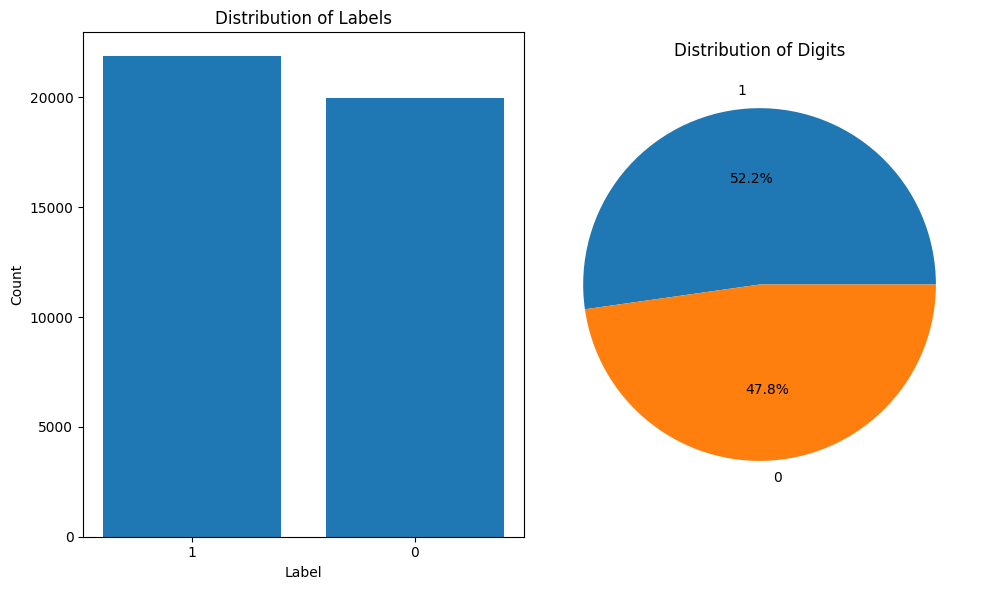

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each label in the 'label' column
label_counts = Dataset2['label'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

axes[0].bar(label_counts.index.astype(str), label_counts.values)
axes[0].set_title('Distribution of Labels')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')

axes[1].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
axes[1].set_title('Distribution of Digits')

plt.tight_layout()
plt.show()

In [36]:
Dataset2

,tweet,label
0,sun down technical director al ahly respected ...,1
1,shawky gharib tie enppi goal return golden square,1
2,egyptian sport news today wednesday many impor...,1
3,main referee committee egyptian football assoc...,1
4,haji bari striker future team undergoing final...,1
...,...,...
19994,hitting referee,0
19995,instead assassinating assassinated al hilal,0
19996,honestly goalkeeper deal best al fath,0
19997,haha goal bangura,0


In [40]:
Dataset2.to_csv(r"SportsData_preprocessing.csv",index=False)